In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
tests=['std','cos','per']

In [5]:
df=pd.DataFrame({'id':[1,2,3],'test1': ['std_1','std_3','std_4'],'test2':['std_4','per_4','cos_1'],'list':[['std','cos','per'],['std'],['std','cos']]})

df

,id,test1,test2,list
0,1,std_1,std_4,"[std, cos, per]"
1,2,std_3,per_4,[std]
2,3,std_4,cos_1,"[std, cos]"


In [18]:
df.loc[[('per' in listi) for listi in df.list]]

,id,test1,test2,list
0,1,std_1,std_4,"[std, cos, per]"


In [12]:
count_in_tests=[(df['list'].apply(lambda x: x.str.contains('per',case=False)).any(axis=1))]
count_in_tests

AttributeError: 'list' object has no attribute 'str'

In [35]:
count_in_tests=sum(df[['test1','test2']].apply(lambda x: x.str.contains('gfd',case=False)).any(axis=1).astype(int))
count_in_tests

0

In [34]:
df['list'].apply(pd.Series).stack().value_counts()

std    3
cos    2
per    1
dtype: int64

In [8]:
def f(row):
    print (row)
    
df['col_3'] = df.apply(lambda x: f(x), axis=1)
df

id                     1
test1              std_1
test2              std_4
list     [std, cos, per]
col_3         std_1std_1
Name: 0, dtype: object
id                2
test1         std_3
test2         per_4
list          [std]
col_3    std_3std_3
Name: 1, dtype: object
id                3
test1         std_4
test2         cos_1
list     [std, cos]
col_3    std_4std_4
Name: 2, dtype: object


,id,test1,test2,list,col_3
0,1,std_1,std_4,"[std, cos, per]",None
1,2,std_3,per_4,[std],None
2,3,std_4,cos_1,"[std, cos]",None


In [63]:
g=pd.Series([x for item in a.list for x in item]).value_counts()

g

a    3
b    2
e    2
c    1
d    1
dtype: int64

<AxesSubplot:>

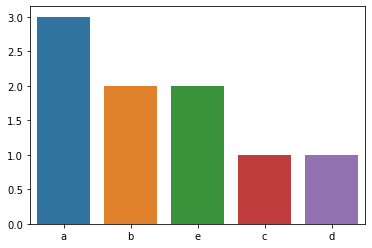

In [65]:
sns.barplot(x=g.index, y=g.values)


<AxesSubplot:ylabel='count'>

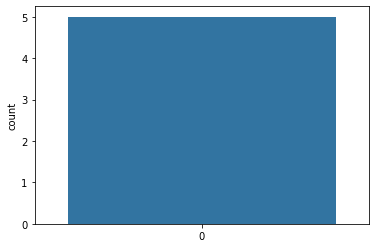

In [58]:
sns.countplot(data=g)


In [ ]:
seaborn.countplot(x='reputation', data=df)


In [38]:
a.test1.replace('_','',inplace=True,regex=True)
a

,id,test1,test2
0,1,std1,std_4
1,2,std3,per_4
2,3,std4,cos_1


In [27]:
a.test1.str.split('_')

0    [std, 1]
1    [std, 3]
2    [std, 4]
Name: test1, dtype: object

In [29]:
a.test1.str.split('_').str[1]

0    1
1    3
2    4
Name: test1, dtype: object

In [33]:
a.apply(lambda x: x.str.split('_').str[1], axis=1)


,id,test1,test2
0,NaN,1,4
1,NaN,3,4
2,NaN,4,1


In [34]:
a

,id,test1,test2
0,1,std_1,std_4
1,2,std_3,per_4
2,3,std_4,cos_1
